In [2]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal
from scipy import stats

import lib_data_filter as dafi
import lib_data_process as dapr
import lib_plot
import lib_import_other_datasource as imoda

In [3]:
datekey = '0315-1'
ante_h_1 = imoda.get_antenne_height(datekey)
datekey = '0315-2'
ante_h_2 = imoda.get_antenne_height(datekey)

/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['r'] = float(index['antenne2r'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datas

In [3]:
tbegin = datetime(year=2023,month=3,day=15,hour=8,minute=0,second=0,tzinfo=timezone.utc)
tend = datetime(year=2023,month=3,day=15,hour=12,minute=30,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,6):
    tticklist.append(tticklist[i-1]+timedelta(minutes=60))
    print(tticklist[i])

2023-03-15 09:00:00+00:00
2023-03-15 10:00:00+00:00
2023-03-15 11:00:00+00:00
2023-03-15 12:00:00+00:00
2023-03-15 13:00:00+00:00


In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:
std_rotate = []
std_normal = []
length_rotate = []
length_stand = []

In [6]:
with open('../data/generated_data/270to330/timeseries_ele5_30_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


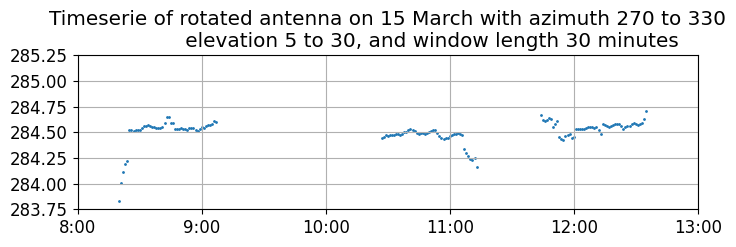

In [7]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
#ax.scatter(time_stand,height_stand,s=1)
#ax.legend(['rotate','normal'])
ax.set_title('Timeserie of rotated antenna on 15 March with azimuth 270 to 330\n \
             elevation 5 to 30, and window length 30 minutes')
ax.set_ylim([283.75,285.25])

ax.set_xlim([tbegin,tend])
fig.set_size_inches(8,2)
ax.set_yticks([283.75,284,284.25,284.5,284.75,285,285.25])
ax.set_xticks(tticklist)
ax.set_xticklabels(['8:00','9:00','10:00','11:00','12:00','13:00'])
ax.grid()

std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))

In [8]:
with open('../data/generated_data/270to330/timeseries_ele5_40_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


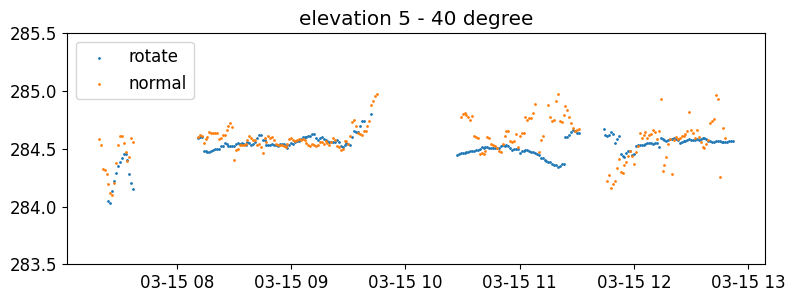

In [9]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotate','normal'])
ax.set_title('elevation 5 - 40 degree')
ax.set_ylim([283.5,285.5])
fig.set_size_inches(9,3)
std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))

In [10]:
with open('../data/generated_data/270to330/timeseries_ele5_50_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


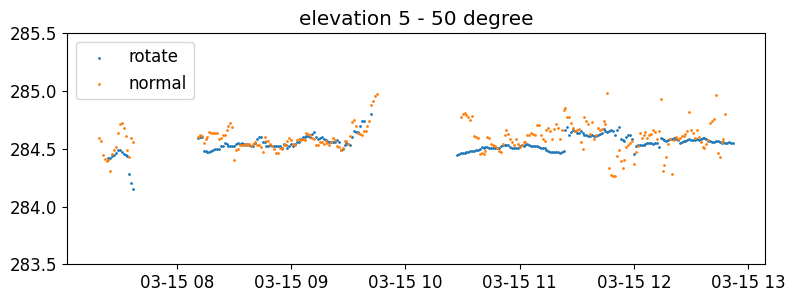

In [11]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotate','normal'])
ax.set_title('elevation 5 - 50 degree')
ax.set_ylim([283.5,285.5])
fig.set_size_inches(9,3)
std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))

In [12]:
with open('../data/generated_data/270to330/timeseries_ele5_60_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


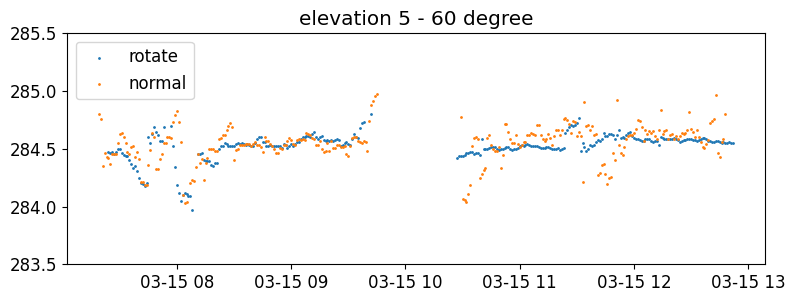

In [13]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotate','normal'])
ax.set_title('elevation 5 - 60 degree')
ax.set_ylim([283.5,285.5])
fig.set_size_inches(9,3)
std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))


In [14]:
with open('../data/generated_data/270to330/timeseries_ele5_70_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


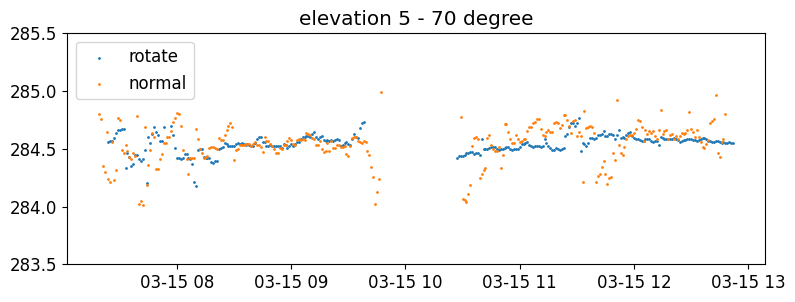

In [15]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotate','normal'])
ax.set_title('elevation 5 - 70 degree')
ax.set_ylim([283.5,285.5])
fig.set_size_inches(9,3)
std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))

In [16]:
with open('../data/generated_data/270to330/timeseries_ele20_70_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


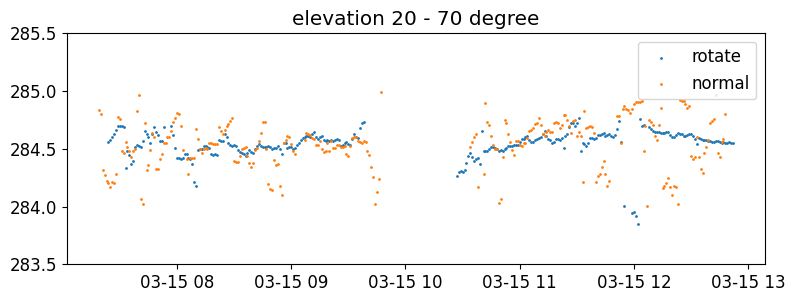

In [17]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotate','normal'])
ax.set_title('elevation 20 - 70 degree')
ax.set_ylim([283.5,285.5])
fig.set_size_inches(9,3)
std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))

In [18]:
with open('../data/generated_data/270to330/timeseries_ele20_50_azi270_330_time30_0315_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


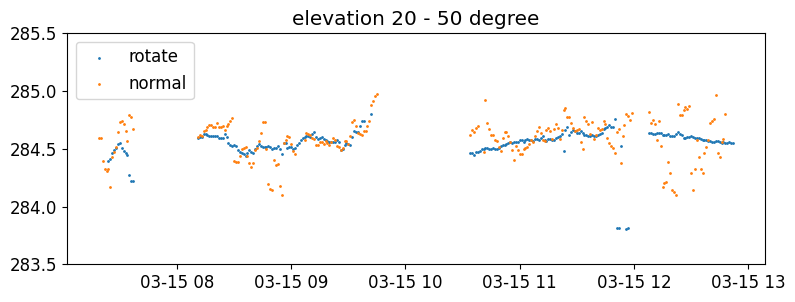

In [19]:
ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.2 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.2 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotate','normal'])
ax.set_title('elevation 20 - 50 degree')
ax.set_ylim([283.5,285.5])
fig.set_size_inches(9,3)
std_rotate.append(round(np.nanstd(height_rotate),2))
std_normal.append(round(np.nanstd(height_stand),2))
a = ~np.isnan(height_rotate)
length_rotate.append(len(height_rotate[a]))
a = ~np.isnan(height_stand)
length_stand.append(len(height_stand[a]))

In [20]:
df = pd.DataFrame({'std stand':std_normal,'std rotate':std_rotate,'length stand':length_stand,'length rotate':length_rotate})
df

,std stand,std rotate,length stand,length rotate
0,0.17,0.14,155,161
1,0.15,0.10,236,237
2,0.12,0.07,254,249
3,0.16,0.12,286,277
4,0.16,0.08,288,278
5,0.21,0.12,274,272
6,0.17,0.12,235,230


In [21]:
alpha = 0.05
F = (std_rotate[4]**2) / (std_normal[4]**2)
df1 = length_rotate[4]-1
df2 = length_stand[4]-1

p_value = 1-stats.f.cdf(F,df1,df2)
if p_value>alpha:
    print('reject')
else:
    print('approve')

reject


In [22]:
F

0.25

In [23]:
print(alpha)
print(p_value)

0.05
1.0


In [24]:
std_rotate[4]

0.08